# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Stanley Alexander Gondowardojo
- **Email Bangkit:** m320b4ky4203@bangkit.academy
- **Email Login Dicoding:** s160422029@student.ubaya.ac.id
- **ID Dicoding:** stanley_alexander

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana cuaca dapat mempengaruhi jumlah penyewaan sepeda setiap harinya?
- Pertanyaan 2 : Bagaimana perubahan musim dapat mempengaruhi jumlah penyewaan sepeda setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv("day.csv") #Membaca file day.csv

df.head(10) #Menampilkan 10 data teratas dari day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Dataset yang diguanakan adalah day.csv dimana dataset tersebut berisi 16 variabel sesuai pada tabel di atas.
- Variabel yang relevan digunakan untuk menjawab pertanyaan adalah
  - season
  - cnt
  - temp
  - weathersit

### Assessing Data

In [5]:
df.info() #Menampilkan informasi mengenai data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset yang diterima sudah lengkap yaitu 16 variabel
- Semua data nya berjumlah 731 yang menandakan tidak ada value yang kurang atau lebih

### Cleaning Data

In [6]:
df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}) #Mengubah data season yang awalnya int menjadi kalimat yang mudah dibaca
df["weathersit"] = df["weathersit"].map({1: "Clear/Partly Cloudy", 2: "Mist/Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}) #Mengubah data weathersit yang awalnya int menjadi kalimat yang mudah dibaca

df.head(10) #Menampilkan 10 data teratas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,0,1,0,4,1,Clear/Partly Cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,0,1,0,5,1,Mist/Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,0,1,0,6,0,Mist/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,0,1,0,0,0,Clear/Partly Cloudy,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,0,1,0,1,1,Clear/Partly Cloudy,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Kolom season sekarang mudah dibaca karena hasil pada tabel sudah diubah dari int diubah menjadi kalimat deskriptif
- Kolom weathersit sekarang mudah dibaca karena hasil pada tabel sudah diubah dari int diubah menjadi kalimat deskriptif

## Exploratory Data Analysis (EDA)

### Explore ...

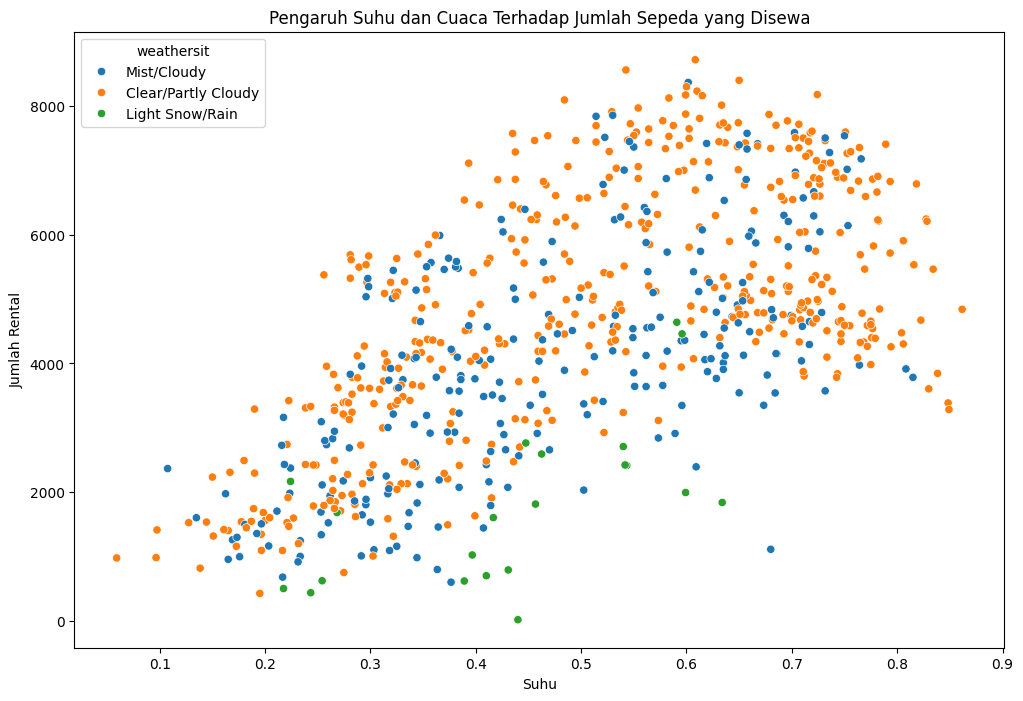

In [9]:
plt.figure(figsize=(12,8)) #Mengatur ukuran gambar yang akan ditampilkan
sns.scatterplot(data=df, x="temp", y="cnt", hue="weathersit") #Membuat visualisasi data menggunakan scatter plot dengan x sebagai suhu dan y sebagai jumlah rental sepeda. Kedua variabel tersebut dipisahkan menggunakan hue sebagai cuaca
plt.title("Pengaruh Suhu dan Cuaca Terhadap Jumlah Sepeda yang Disewa") #Judul dari visualisasi data
plt.xlabel("Suhu") #Nama label di sumbu x
plt.ylabel("Jumlah Rental") #Nama label di sumbu y
plt.show() #Menampilkan gambar

**Insight:**
- Semakin tinggi suhu temperaturnya, maka semakin tinggi juga jumlah penyewaan sepedanya
- Kondisi cuaca bersalju atau hujan membuat jumlah penyewaan sepeda menjadi menurun

## Visualization & Explanatory Analysis

### Pertanyaan 1:

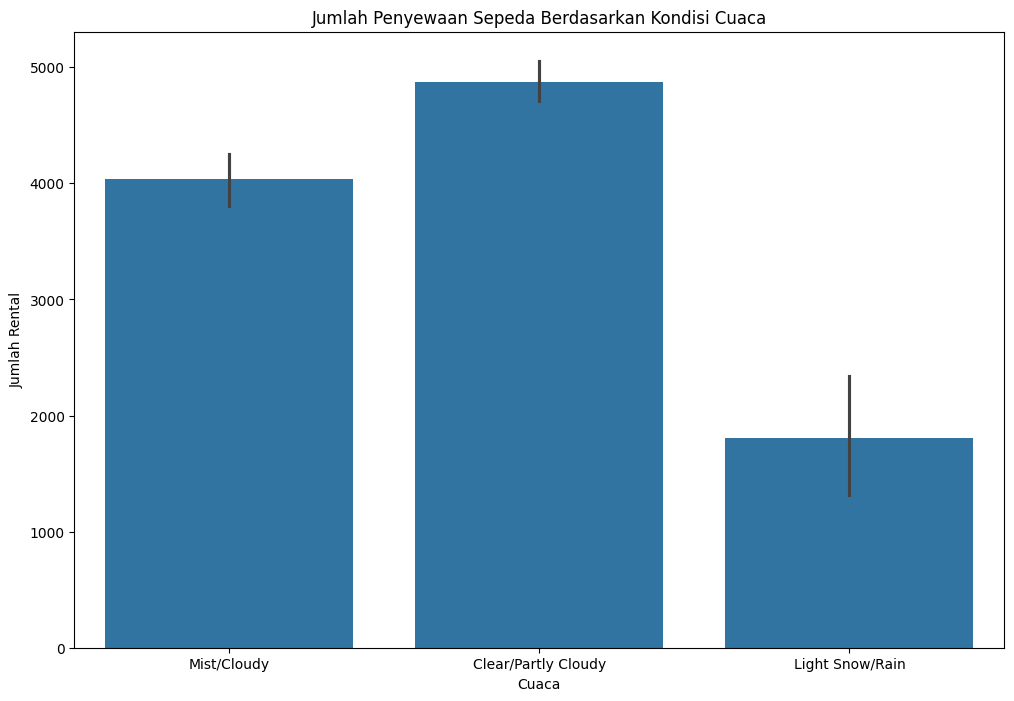

In [8]:
plt.figure(figsize=(12,8)) #Mengatur ukuran gambar yang akan ditampilkan
sns.barplot(data=df, x="weathersit", y="cnt") #Membuat visualisasi data menggunakan bar plot dengan x sebagai cuaca dan y sebagai jumlah rental sepeda
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca") #Judul visualisasi data
plt.xlabel("Cuaca") #Nama label di sumbu x
plt.ylabel("Jumlah Rental") #Nama label di sumbu y
plt.show() #Menampilkan gambar

### Pertanyaan 2:

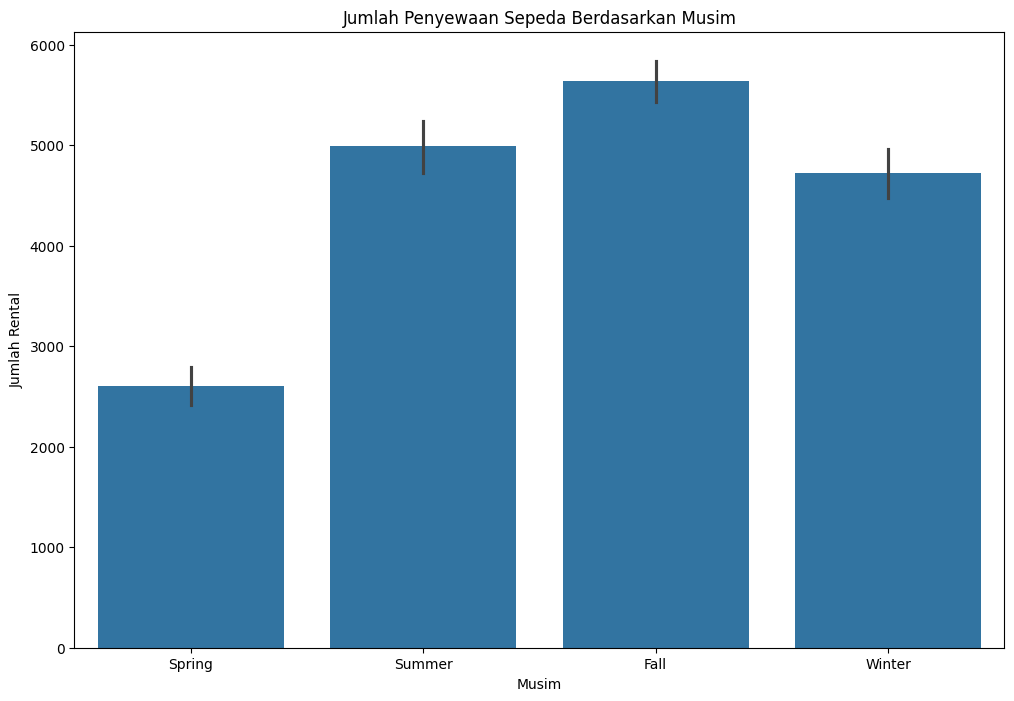

In [10]:
plt.figure(figsize=(12,8)) #Mengatur ukuran gambar yang akan ditampilkan
sns.barplot(data=df, x="season", y="cnt") #Membuat visualisasi data menggunakan bar plot dengan x sebagai musim dan y sebagai jumlah rental sepeda
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim") #Judul visualisasi data
plt.xlabel("Musim") #Nama label di sumbu x
plt.ylabel("Jumlah Rental") #Nama label di sumbu y
plt.show() #Menampilkan gambar

**Insight:**
- Pada visualisasi data pertanyaan 1, cuaca cerah meningkatkan jumlah penyewaan sepeda setiap harinya
- Pada visualisasi data pertanyaan 2, jumlah penyewaan tertinggi dicapai pada musim kemarau dan penyewaan terendah dicapai oleh musim semi

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : cuaca yang cerah ataupun berawan dapat meningkatkan hasil penyewaan sepeda, sedangkan cuaca yang buruk, seperti hujan atau bersalju dapat menurunkan hasil penyewaan sepeda
- Conclution pertanyaan 2 : banyak orang yang menyewa sepeda pada musim gugur, namun pada musim semi tidak banyak yang ingin menyewa sepeda dibandingkan pada musim lainnya